In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [13]:
cols_name = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols_name)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [14]:
df["class"] = (df["class"] == "g").astype(int)

In [15]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [16]:
df.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,0


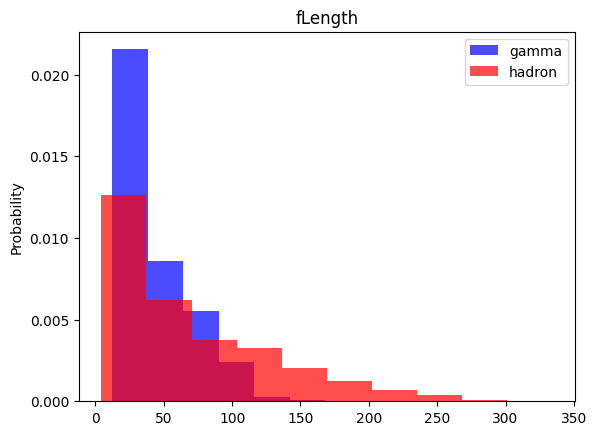

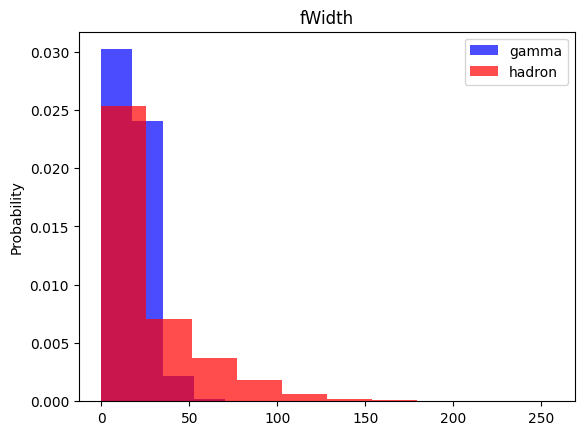

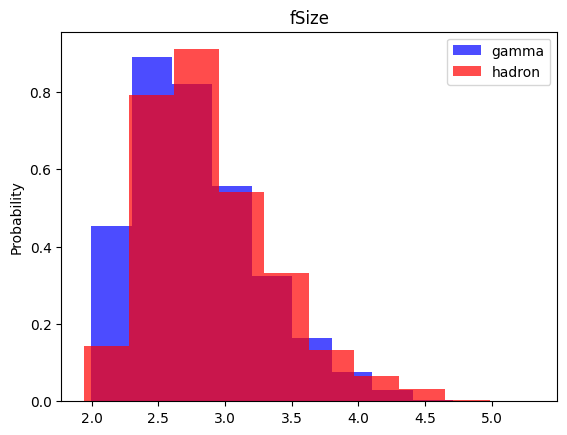

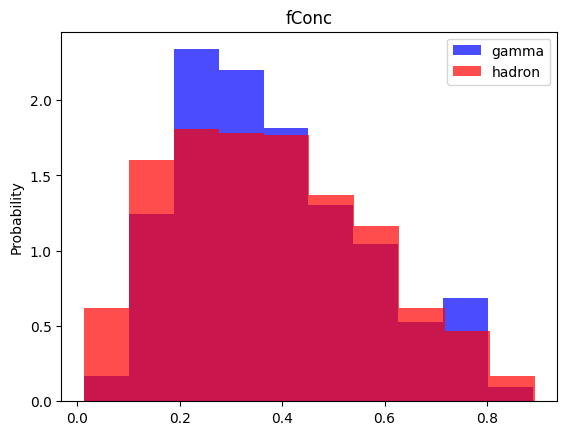

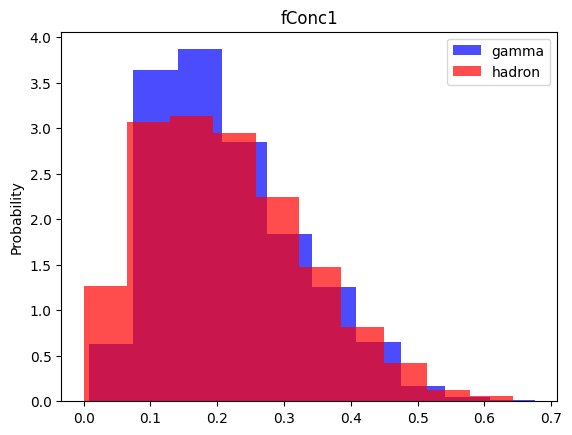

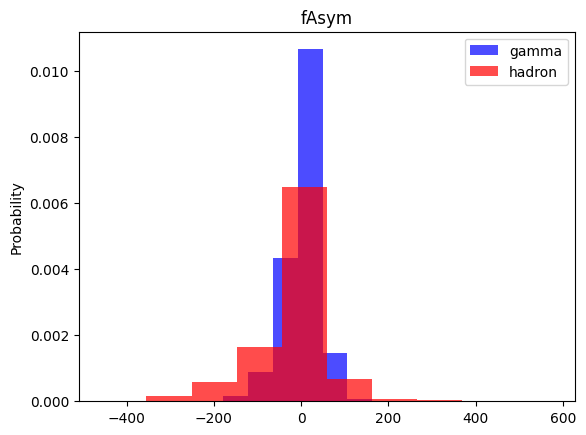

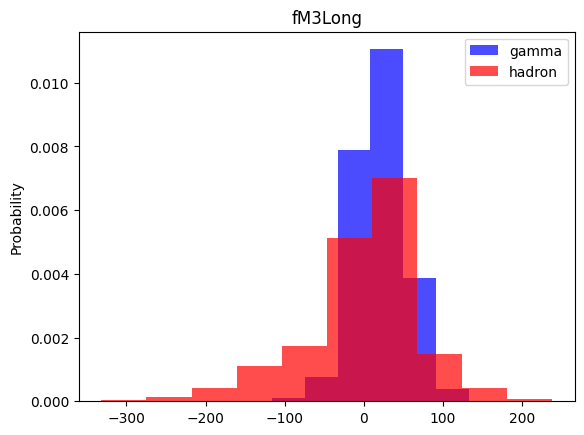

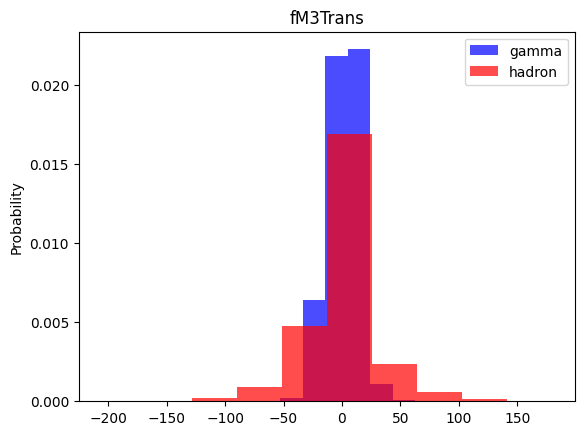

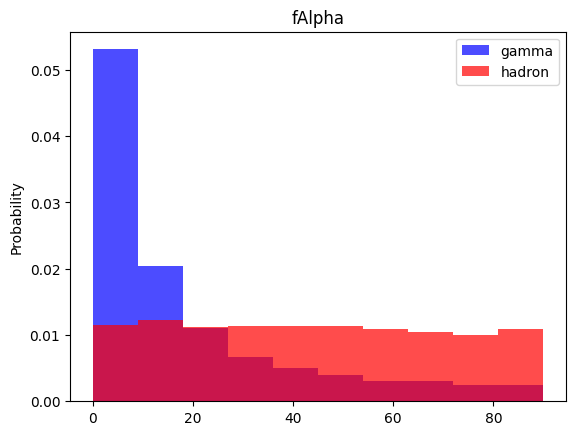

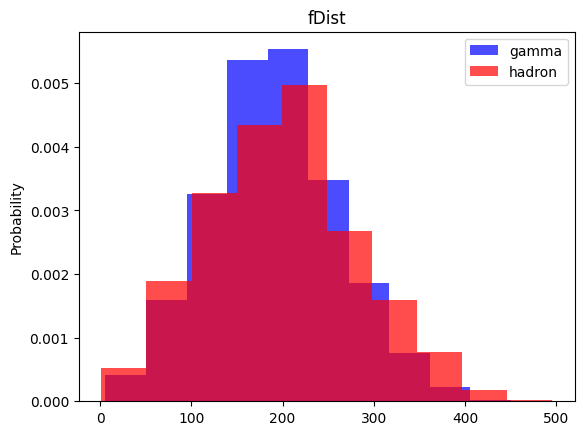

In [17]:
for label in cols_name[:-1]:
    # density set to True because it normalizes the histogram so that the total area under all bars equals to 1
    # density set to True is helpful for overlaying multiple histograms since it removes the effect of different sample sizes
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()


Train, validation, and test datasets

In [18]:
# train = 0 to 60, valid = 60 to 80, test = 80 to 100
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print(train)
print(valid)
print(test)


       fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
7395   16.7618   7.1765  2.3738  0.8499  0.5729   4.0671   6.7219   -5.8627   
16964  46.3735  22.7618  2.7980  0.3003  0.1489  12.7939  15.4585    6.6745   
7966   50.3756  21.5114  2.9722  0.2303  0.1327  11.3523 -25.1446   -8.5467   
6837   56.2951  14.8229  2.6263  0.2459  0.1241  35.8263  20.0519  -10.2351   
342    28.3371  24.9896  2.9680  0.3337  0.1900  27.1233  22.0479  -15.7731   
...        ...      ...     ...     ...     ...      ...      ...       ...   
14810  19.6894   9.5720  2.7192  0.5990  0.3105  -6.0830  17.5670   -9.9337   
16928  16.5019   8.3238  2.6924  0.4710  0.2389 -24.9345  12.3367    0.7987   
12641  50.7195  12.1569  2.6498  0.4166  0.2318  30.2989  45.4964  -11.1641   
15406  41.2800  26.0503  3.3525  0.1952  0.0933  18.5883 -46.5309  -15.1777   
4862   19.7158  18.1893  2.4257  0.4991  0.2570  20.3809  18.8192   18.6287   

        fAlpha     fDist  class  
7395   18.9207  1

c:\Users\Mary Kate\.vscode\FreeCodeCamp_Machine_Learning\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


- The dataset should be scaled because each data is too large or too small with each other
- Standard Scaler - makes each feature have mean of 0, standard deviation of 1 so features with big units don't overpowered small ones
- Centering mean to 0 shifts each feature so the cloud of points is centered, avoiding one feature's average aacting like an offset
- Scaling to standard deviation 1 makes all features equally spread so (go back to Standard Scaler)

In [19]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()

    # standardizes x (keeping mean 0 and std mean 1)
    X = scaler.fit_transform(X) 

    # Oversampling is needed becauseof class imbalance (one class is much rarer than the other)
    # This is to avoid bias by predicting majority class most of the time and still get high accuracy while missing many rare cases
    # RandomOverSampler - duplicates minority examples
    # RandomOverSampler - only for train dataset (not validation and test so that evaluation is still after the truth)
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # np.reshape(-1, 1) turns 1D label into 2D. Example: y = [0, 1, 1, 0] (4,) turns into [[0], [1], [1], [0]] (4,1)
    # np.hstack() concatenates the scaled features and the label side by side producing a single array
    data = np.hstack((X, np.reshape(y, (-1, 1)))) 

    return data, X, y

In [20]:
print(f"Gamma: {len(train[train["class"]==1])}") # gamma
print(f"Hadron: {len(train[train["class"]==0])}") # hadron

Gamma: 7355
Hadron: 4057


In [21]:
train, X_train, y_train = scale_dataset(train, oversample=True)
print(len(train))
print(len(X_train))
print(len(y_train))

14710
14710
14710


c:\Users\Mary Kate\.vscode\FreeCodeCamp_Machine_Learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Mary Kate\.vscode\FreeCodeCamp_Machine_Learning\.venv\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Mary Kate\.vscode\FreeCodeCamp_Machine_Learning\.venv\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
